## This is to estimate how much is someone's medical bill going to be, depending on their BMI, smoking habit, gender, number of children, and age

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#import the csv file
bill = pd.read_csv('insurance.csv', sep=',')

In [3]:
bill

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#1338 rows and 7 columns were presented in the csv file
bill.shape

(1338, 7)

In [5]:
#data type of the columns
bill.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
#Create numeric values for the smoking habit
condition =[(bill['smoker'] == 'yes'), (bill['smoker'] == 'no')]
values = [1,0]

bill['smoking_habit'] = np.select(condition, values)

In [7]:
#see if there's any null value in the dataset
bill.isnull().values.any()

False

In [8]:
#see if any na value in the dataset
bill.isna().values.any()

False

In [9]:
#see how many male and female patients in this csv file, they are quite balanced
bill.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
#regions where the patients are from, a bit more from southeast than in northeast
bill.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [11]:
bill.describe()

,age,bmi,children,charges,smoking_habit
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000


In [26]:
#make classifications for these, these classification are from the BMI Calculator
#18.5 or less	Underweight
#18.5 to 24.99	Normal Weight
#25 to 29.99	Overweight
#30 to 34.99	Obesity (Class 1)
#35 to 39.99	Obesity (Class 2)
#40 or greater	Morbid Obesity
condition =[(bill['bmi'] <= 18.5), (bill['bmi'] > 18.5) & (bill['bmi'] <= 24.99),(bill['bmi'] > 24.99) & (bill['bmi'] <= 29.99),
            (bill['bmi'] > 29.99) & (bill['bmi'] <= 34.99), (bill['bmi'] > 34.99) & (bill['bmi'] <= 39.99),(bill['bmi'] > 39.99)]
values = [0,1,2,3,4,5]

bill['BMI_Classification'] = np.select(condition, values)
#As for the values:
#0: 'Underweight', 1:'Normal', 2:'Overweight', 
#3:'Class 1 Obese', 4:'Class 2 Obese', 5:'Morbid Obesity'

In [29]:
#checking everyone's BMI level
underweight = bill.loc[bill['BMI_Classification'] == 0]
print('There are',len(underweight), 'underweight patients.')
normal = bill.loc[bill['BMI_Classification'] == 1]
print('There are', len(normal), 'normal weight patients.')
overweight = bill.loc[bill['BMI_Classification'] == 2]
print('There are', len(overweight), 'overweight patients.')
c1_obese = bill.loc[bill['BMI_Classification'] == 3]
print('There are', len(c1_obese), 'class 1 obese patients.')
c2_obese = bill.loc[bill['BMI_Classification'] == 4]
print('There are', len(c2_obese), 'class 2 obese patients.')
morbid = bill.loc[bill['BMI_Classification'] == 5]
print('There are', len(morbid), 'morbid obese patients.')

There are 21 underweight patients.
There are 224 normal weight patients.
There are 386 overweight patients.
There are 391 class 1 obese patients.
There are 224 class 2 obese patients.
There are 92 morbid obese patients.


In [30]:
#seeing how many smokers and non-smokers are in the dataset
smokers = bill.loc[bill['smoking_habit'] == 1]
nonsmokers = bill.loc[bill['smoking_habit'] == 0]
print('There are',len(smokers), 'smoker patients.')
print('There are',len(nonsmokers), 'non-smoker patients.')

There are 274 smoker patients.
There are 1064 non-smoker patients.


In [31]:
cost =[(bill['charges'] < 5000), (bill['charges'] >= 5000) & (bill['charges'] < 10000), 
       (bill['charges'] >= 10000) & (bill['charges'] < 20000),(bill['charges'] >= 20000) & (bill['charges'] < 30000),
      (bill['charges'] >= 30000) & (bill['charges'] < 40000),(bill['charges'] >= 40000) & (bill['charges'] < 50000),
      (bill['charges'] >= 50000) & (bill['charges'] < 60000), (bill['charges'] >= 60000)]
values = ['less than 5k','less than 10k','less than 20k','less than 30k','less than 40k',
          'less than 50k', 'less than 60k','more than 60k']

bill['cost'] = np.select(cost, values)

Hurts = bill.loc[bill['cost'] == 'less than 5k']
print(len(Hurts), 'pay less than 5k')
CallRelative = bill.loc[bill['cost'] == 'less than 10k']
print(len(CallRelative), 'pay less than 10k')
SmLoan = bill.loc[bill['cost'] == 'less than 20k']
print('There are', len(SmLoan), 'pay less than 20k')
MedLoan = bill.loc[bill['cost'] == 'less than 30k']
print('There are', len(MedLoan), 'pay less than 30k')
BigLoan = bill.loc[bill['cost'] == 'less than 40k']
print('There are', len(BigLoan), 'pay less than 40k')
LifeSaving = bill.loc[bill['cost'] == 'less than 50k']
print('There are', len(LifeSaving), 'pay less than 50k')
InDebtforMo = bill.loc[bill['cost'] == 'less than 60k']
print('There are', len(InDebtforMo), 'pay less than 60k')
InDebtForYr = bill.loc[bill['cost'] == 'more than 60k']
print('There are', len(InDebtForYr), 'pay more than 60k')

359 pay less than 5k
353 pay less than 10k
There are 353 pay less than 20k
There are 111 pay less than 30k
There are 83 pay less than 40k
There are 72 pay less than 50k
There are 4 pay less than 60k
There are 3 pay more than 60k


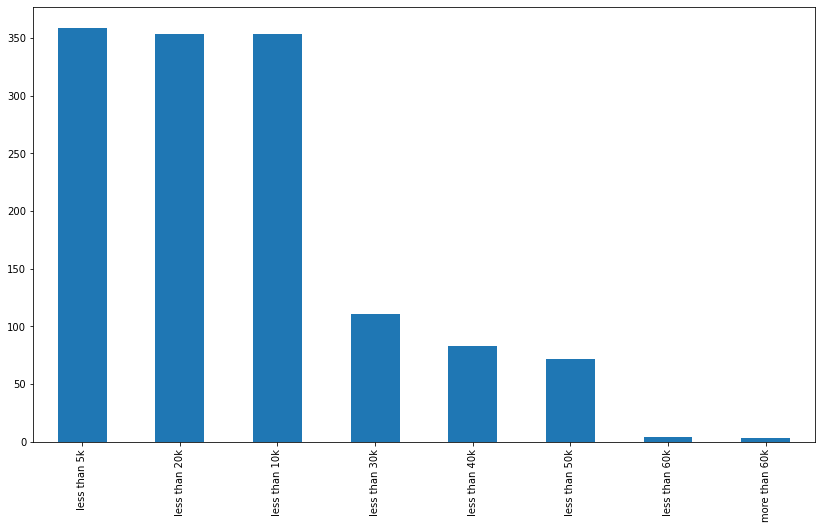

In [32]:
bill.cost.value_counts().plot(kind='bar', figsize=(14,8));   
#Most people don't need to spend their "life saving" to pay their medical bill, most of them are less than 10k

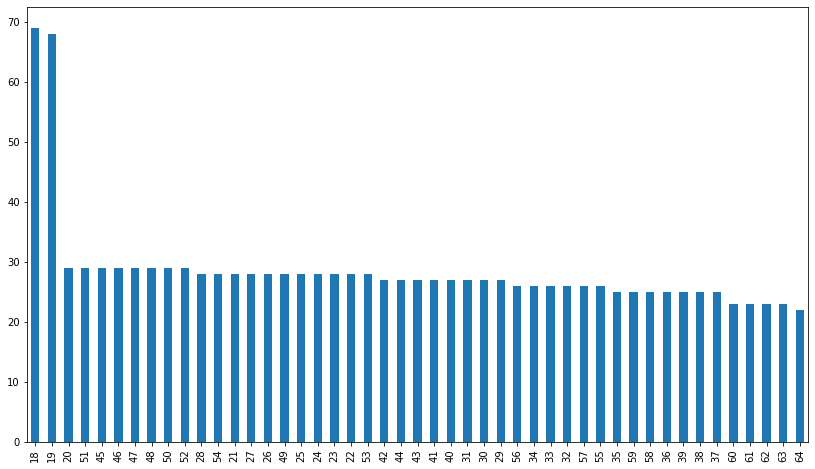

In [33]:
#To see how many people per age, all years old are having enough representations hence I am not to to 
#classify them further

bill.age.value_counts().plot(kind='bar', figsize=(14,8));  

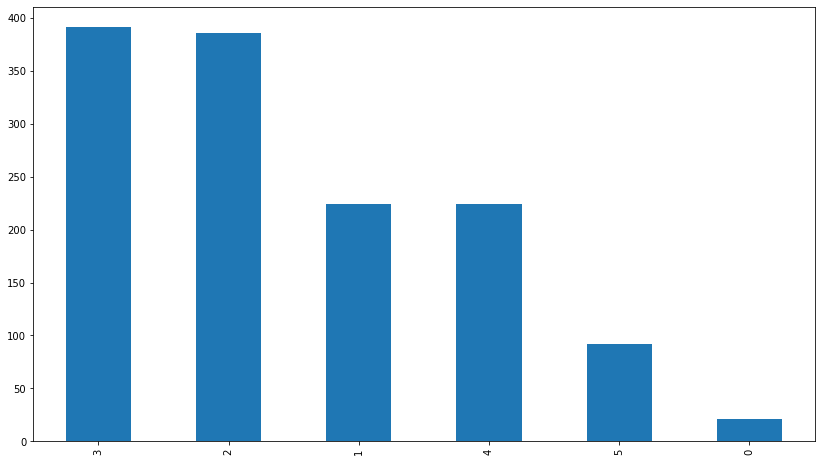

In [34]:
bill.BMI_Classification.value_counts().plot(kind='bar', figsize=(14,8));   
#How many people per BMI classes


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'charges'}>,
        <AxesSubplot:title={'center':'smoking_habit'}>,
        <AxesSubplot:title={'center':'BMI_Classification'}>],
       [<AxesSubplot:title={'center':'location'}>,
        <AxesSubplot:title={'center':'gender'}>, <AxesSubplot:>]],
      dtype=object)

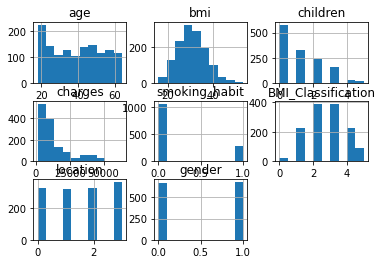

In [35]:

#There are a bit more young adult patients than mid-age and older adults, most of the patients have the bmi around
#30, most patients have less than 2 kids, and most of the charges are less than $20,000, and most people are not
#smokers
bill.hist()

In [36]:
#checking if there's any corrlation among the columns of age, BMI, number of children, medical bill, and their 
#smoking habit. And the location is irrelevant because it only represents the part of US, and patients are from
#different parts of the US
#The most relevant to charges are smoking habit, age, and BMI 
bill.corr()

,age,bmi,children,charges,smoking_habit,BMI_Classification,location,gender
age,1.000000,0.109272,0.042469,0.299008,-0.025019,0.112475,-0.005212,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,0.003750,0.965048,0.261829,0.046371
children,0.042469,0.012759,1.000000,0.067998,0.007673,-0.003964,-0.019257,0.017163
charges,0.299008,0.198341,0.067998,1.000000,0.787251,0.204069,0.056993,0.057292
smoking_habit,-0.025019,0.003750,0.007673,0.787251,1.000000,0.004899,0.053930,0.076185
BMI_Classification,0.112475,0.965048,-0.003964,0.204069,0.004899,1.000000,0.239593,0.050460
location,-0.005212,0.261829,-0.019257,0.056993,0.053930,0.239593,1.000000,0.016121
gender,-0.020856,0.046371,0.017163,0.057292,0.076185,0.050460,0.016121,1.000000


In [37]:
bill.head()

,age,sex,bmi,children,smoker,region,charges,smoking_habit,BMI_Classification,cost,location,gender
0,19,female,27.900,0,yes,southwest,16884.92400,1,2,less than 20k,2,0
1,18,male,33.770,1,no,southeast,1725.55230,0,3,less than 5k,3,1
2,28,male,33.000,3,no,southeast,4449.46200,0,3,less than 5k,3,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1,less than 30k,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,2,less than 5k,0,1


In [38]:
#Convert the 4 different part of the US into numerical value, NW as 0, NE as 1, SW as 2, SE as 3
location = [(bill['region'] == 'northwest'),(bill['region'] == 'northeast'),(bill['region'] == 'southwest'),(bill['region'] == 'southeast')]
values = [0,1,2,3]
bill['location']=np.select(location, values)


In [39]:
#Convert the sexes value in to numeric value, 0 as female, 1 as male
gender = [(bill['sex'] == 'female'),(bill['sex'] == 'male')]
values = [0,1]
bill['gender']=np.select(gender, values)

age                   0.299008
bmi                   0.198341
children              0.067998
charges               1.000000
smoking_habit         0.787251
BMI_Classification    0.204069
location              0.056993
gender                0.057292
Name: charges, dtype: float64


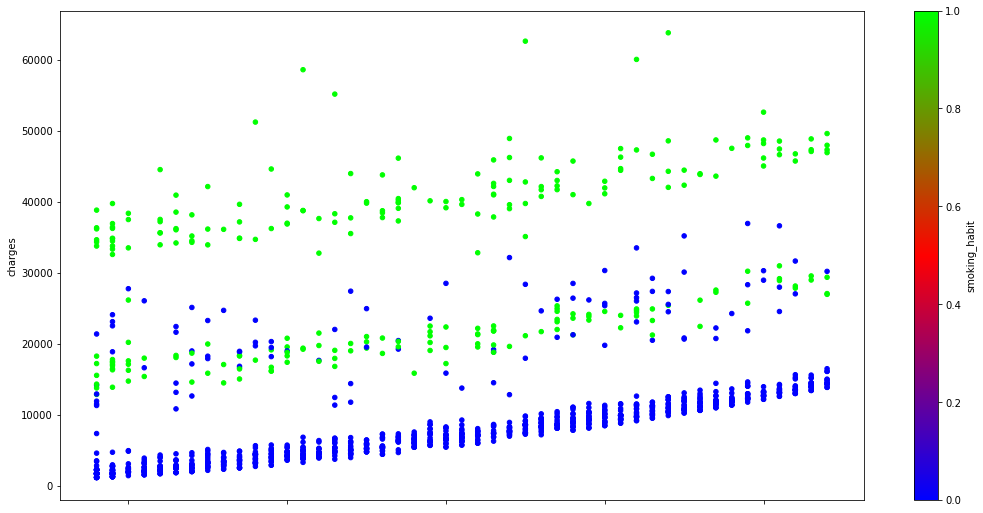

In [40]:
#There's an obvious trend of as age increase, the medical bill is going to increase
#Greens are smokers, blues are non-smokers
bill.plot(kind='scatter', x='age', y='charges', c='smoking_habit', colormap = 'brg',figsize=(18,9));
plt.xlabel=['age']
plt.title=['How much did each patient paid']

print((bill.corr()['charges']))  

age                   0.299008
bmi                   0.198341
children              0.067998
charges               1.000000
smoking_habit         0.787251
BMI_Classification    0.204069
location              0.056993
gender                0.057292
Name: charges, dtype: float64


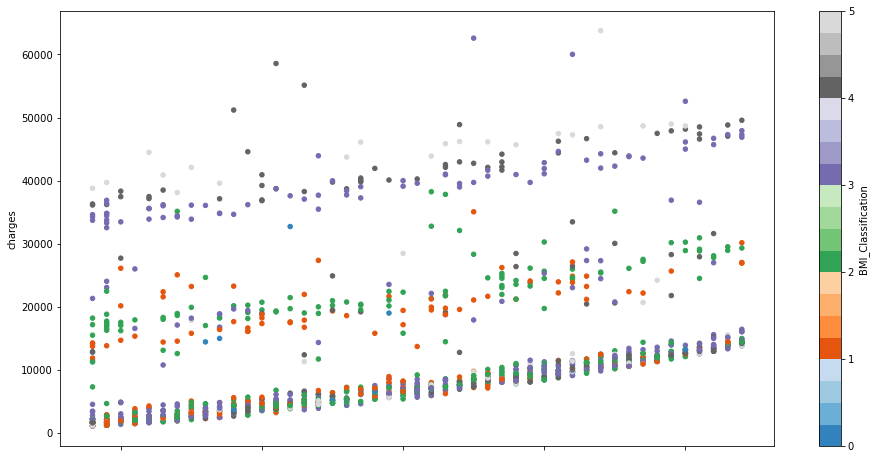

In [41]:
#scatter plot with x is age, y as charges, but colored depending on the BMI classification by the BMI Calculator
#blue is underweight, orange is normal, green is overweight
#purple is class 1 obese, dark grey is class 2 obese, light grey is morbid obese
#It seems like no matter in which age group, the "top spenders" will the the one with higher BMI
bill.plot(kind='scatter', x='age', y='charges', c='BMI_Classification', colormap = 'tab20c',figsize=(16,8));

print((bill.corr()['charges']))  

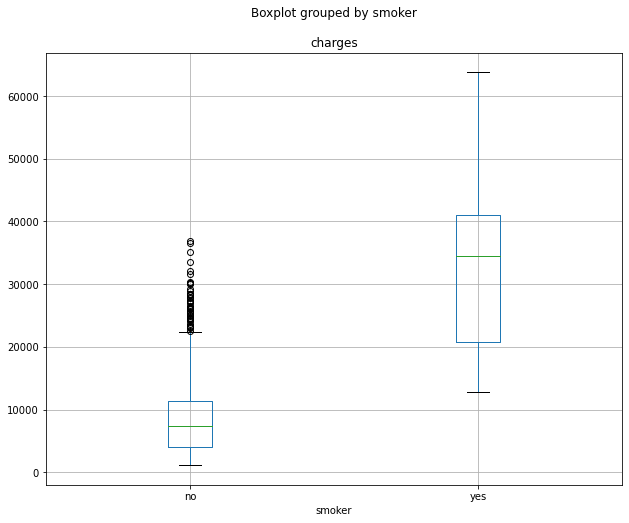

In [42]:
#smokers also has a higher chance to receive a higher medical bill, due to their smoking habit
bill.boxplot('charges',by='smoker',figsize=(10,8));

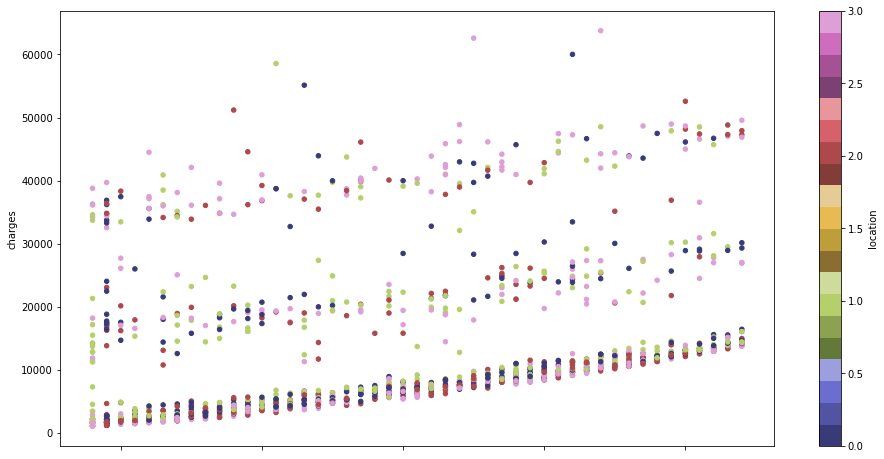

In [43]:
#scatter plot with x is age, y as charges, but colored depending on the location
#Purple is Northwest, light-green is Northest, red is Southwest, and pink is southeast
bill.plot(kind='scatter', x='age', y='charges', c='location', colormap = 'tab20b',figsize=(16,8));
plt.xlabel=['age']

In [44]:
#In average, smokers' bills are 3.8 times higher than non smokers
bill.groupby('smoker').mean()

,age,bmi,children,charges,smoking_habit,BMI_Classification,location,gender
smoker,,,,,,,,
no,39.385338,30.651795,1.090226,8434.268298,0.0,2.631579,1.513158,0.485902
yes,38.514599,30.708449,1.113139,32050.231832,1.0,2.645985,1.664234,0.580292


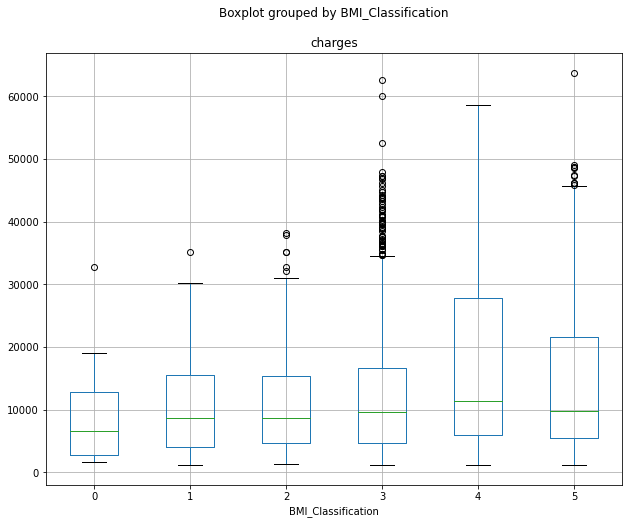

In [45]:
bill.sort_values('bmi', ascending=True, inplace=True)
bill.boxplot('charges',by='BMI_Classification',figsize=(10,8));
#Every BMI classifications have similar minimum charge, but the Obese groups have a much higher upper limit

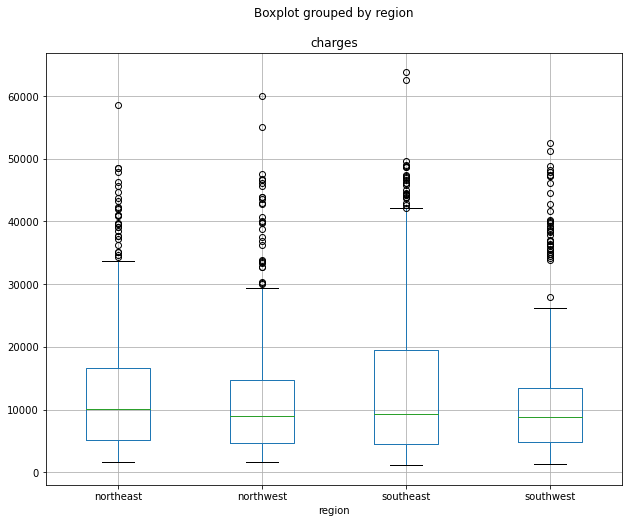

In [46]:
bill.sort_values('location', ascending=True, inplace=True)
bill.boxplot('charges',by='region',figsize=(10,8));
#See which part of the US pays the most for medical bills

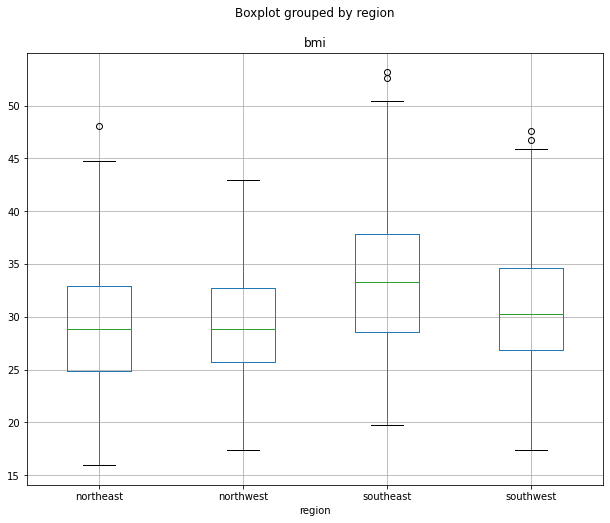

In [47]:
bill.sort_values('location', ascending=True, inplace=True)
bill.boxplot('bmi',by='region',figsize=(10,8));
#Sorting BMI of each patient by region, it seems like southeastern part of the US has higher BMI than the other
#parts of the US in general, and the 3 parts are having similar box plots

In [48]:
#In median, smokers' bills are 4.69 times higher than non smokers, and they have similar age and BMI
bill.groupby('smoker').median().round(2)

,age,bmi,children,charges,smoking_habit,BMI_Classification,location,gender
smoker,,,,,,,,
no,40,30.35,1,7345.41,0,3,2,0
yes,38,30.45,1,34456.35,1,3,2,1


In [49]:
#In average, smokers' bills are 3.8 times higher than non smokers, and they have similar age and BMI
bill.groupby('smoker').mean().round(2)

,age,bmi,children,charges,smoking_habit,BMI_Classification,location,gender
smoker,,,,,,,,
no,39.39,30.65,1.09,8434.27,0.0,2.63,1.51,0.49
yes,38.51,30.71,1.11,32050.23,1.0,2.65,1.66,0.58


In [50]:
#As BMI level increases, the charages is likely going to increase too
#The smokers comes in all BMI classification, and age seems to have a slight corrlation with BMI
#As age increases, metabolsm decreases
bill.groupby('BMI_Classification').mean().sort_values('bmi').round(2)

,age,bmi,children,charges,smoking_habit,location,gender
BMI_Classification,,,,,,,
0,32.38,17.61,1.05,8657.62,0.24,0.86,0.38
1,36.75,22.63,1.13,10434.53,0.22,1.29,0.48
2,38.92,27.60,1.06,10987.51,0.19,1.40,0.48
3,39.38,32.34,1.15,14419.67,0.19,1.47,0.52
4,41.91,37.17,1.02,17054.93,0.22,1.94,0.53
5,40.63,43.07,1.13,16707.66,0.23,2.25,0.55


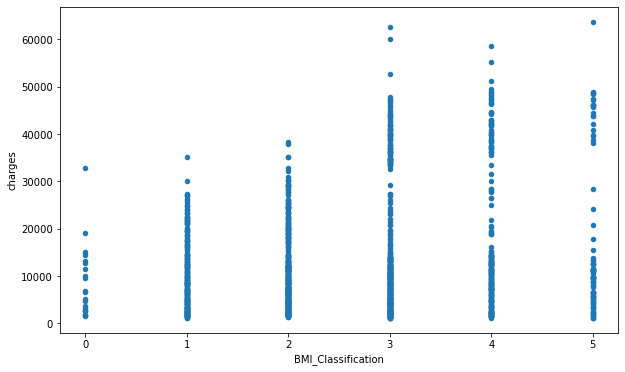

In [51]:
#As the BMI class increases, the upper limit and the median charge for the medical bill will likely
#to increase especially for class 1 obesesity and beyond. Being obese "unlocks" more serious illnesses
bill.sort_values('bmi', ascending=True, inplace=True)
bill.plot(kind='scatter', x='BMI_Classification', y='charges', figsize=(10, 6));

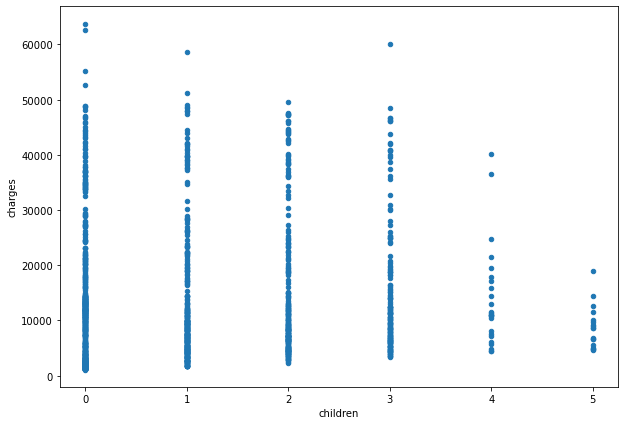

In [52]:
#Most patients have less than 3 children, it seesm like having more children will likely to decrease
#the medical bill amount. Of course corration doesn't mean causation, or having children can change
#someone's diet/living style
bill.plot(kind='scatter', x='children', y='charges', figsize=(10,7));

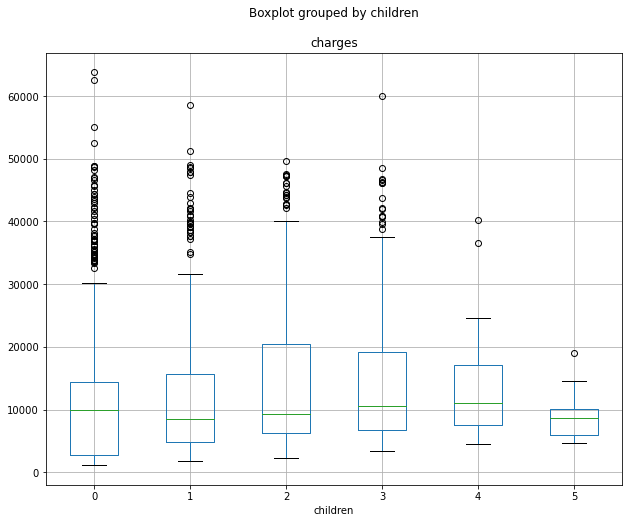

In [53]:
bill.sort_values('children', ascending=True, inplace=True)
bill.boxplot('charges',by='children',figsize=(10,8));
#It could be explained that there are very few people that has more than 3 children, or they are less willing
#to spend money on medical expense, or they care more about their health than those having no children

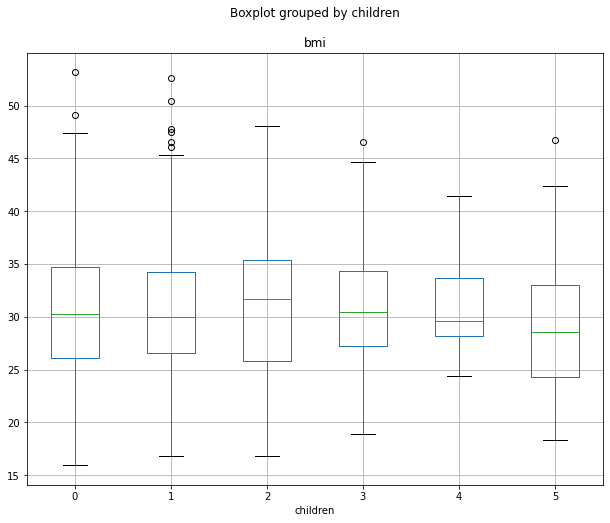

In [54]:
#Just curious to see the relationship between number of children and BMI, the middle part 
#of the box plot didn't change much but the top limit decrease. Was it becuase the stress from children?
bill.sort_values('children', ascending=True, inplace=True)
bill.boxplot('bmi',by='children',figsize=(10,8));

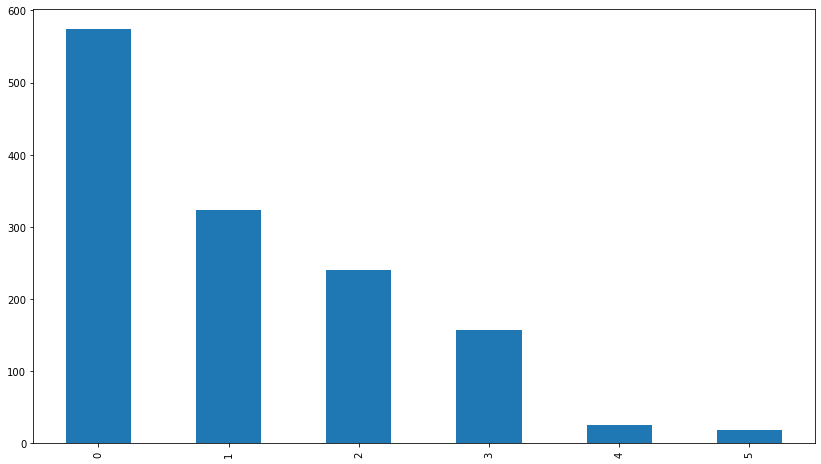

In [63]:
#How many children do each patients have?
bill.children.value_counts().plot(kind='bar', figsize=(14,8));   

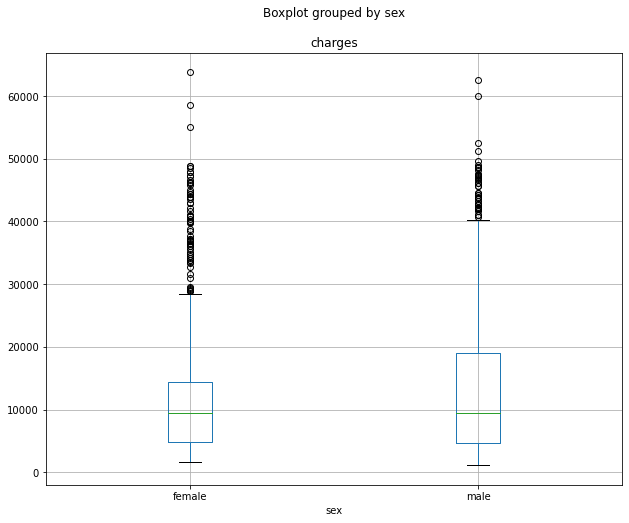

In [55]:
#Gender doesn't play much of a role in the charge amount
bill.boxplot('charges',by='sex',figsize=(10,8));

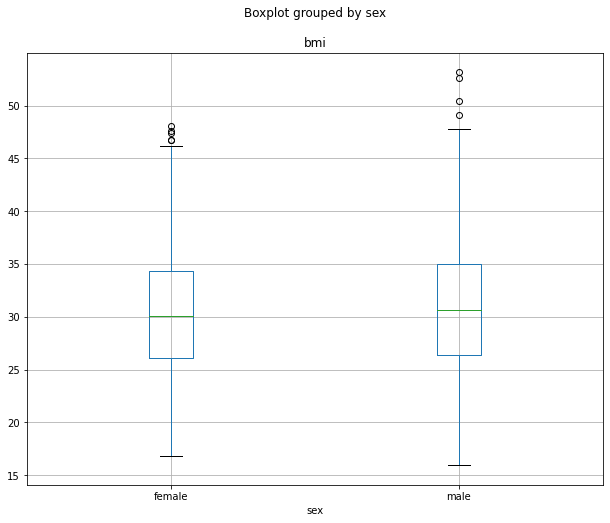

In [56]:
#Out of curious, see how different gender has different BMI level
bill.boxplot('bmi',by='sex',figsize=(10,8));

In [57]:
#Final describing the basic statistics of the dataset
bill.describe()

,age,bmi,children,charges,smoking_habit,BMI_Classification,location,gender
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783,2.634529,1.544096,0.505232
std,14.049960,6.098187,1.205493,12110.011237,0.403694,1.187155,1.130888,0.500160
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,2.000000,1.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,3.000000,2.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,3.000000,3.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,5.000000,3.000000,1.000000


In [58]:
#The top 5 rows of the dataset
bill.head()

,age,sex,bmi,children,smoker,region,charges,smoking_habit,BMI_Classification,cost,location,gender
172,18,male,15.96,0,no,northeast,1694.7964,0,0,less than 5k,1,1
109,63,male,35.09,0,yes,southeast,47055.5321,1,4,less than 50k,3,1
904,60,female,35.10,0,no,southwest,12644.5890,0,4,less than 20k,2,0
414,19,female,35.15,0,no,northwest,2134.9015,0,4,less than 5k,0,0
1031,55,female,35.20,0,yes,southeast,44423.8030,1,4,less than 50k,3,0


In [59]:
#Final correlation with charges among other factors
print((bill.corr()['charges']))

age                   0.299008
bmi                   0.198341
children              0.067998
charges               1.000000
smoking_habit         0.787251
BMI_Classification    0.204069
location              0.056993
gender                0.057292
Name: charges, dtype: float64
